# Graduate Rotational Internship Program - The Sparks Foundation

# GripJuly2021

Parv Arora

Task 1: Predicting the percentage of a student based on their no. of study hours

Simple Linear Regression



In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("student_scores.csv")

In [60]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [62]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [63]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [64]:
x = df['Hours']
y = df['Scores']

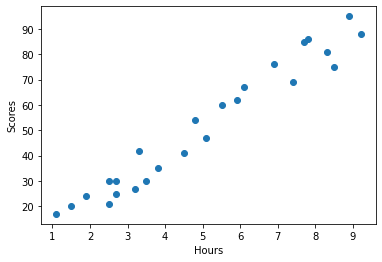

In [65]:
plt.scatter(x,y)
plt.xlabel("Hours",fontsize = 10)
plt.ylabel("Scores",fontsize = 10)
plt.show()

In [66]:
x_values = x.values.reshape(-1,1)

Splitting Training and Testing Data

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_values,y,test_size = 0.2, random_state = 0)

Training the Model (Linear Regression)

In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Plotting the regression line

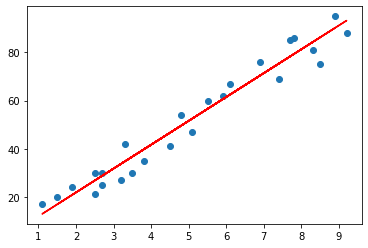

In [77]:
line = lr.coef_ * x + lr.intercept_
plt.scatter(x,y)
plt.plot(x,line,color = 'red')
plt.show()

Making Predictions

In [70]:
y_predicted = lr.predict(x_test)

In [71]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
data

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Predicting for a student that studies 9.25 hours

In [72]:
test = lr.predict(np.array([9.25]).reshape(1,1))
print("The prediction for 9.25 hours is {}".format(test[0]))

The prediction for 9.25 hours is 93.69173248737538


In [75]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_predicted)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('R-2:', metrics.r2_score(y_test, y_predicted))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
